#### Mount the drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

In [27]:
df = pd.read_csv('/content/drive/My Drive/Python_Videos/Logistic_Regression using Image segmentation dataset/Image_Segmentation.csv')
df.head() # top 5 rows

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [29]:
df.shape
# num of rows = 209, num of cols = 20

(209, 20)

#### Handling null Values

In [30]:
df.isnull().sum()

Class                   0
region.centroid.col     0
region.centroid.row     0
region.pixel.count      0
short.line.density.5    0
short.line.density.2    0
vedge.mean              0
vegde.sd                0
hedge.mean              0
hedge.sd                0
intensity.mean          0
rawred.mean             0
rawblue.mean            0
rawgreen.mean           0
exred.mean              0
exblue.mean             0
exgreen.mean            0
value.mean              0
saturation.mean         0
hue-mean                0
dtype: int64

#### Checking data Types

In [32]:
df.dtypes

Class                    object
region.centroid.col       int64
region.centroid.row       int64
region.pixel.count        int64
short.line.density.5    float64
short.line.density.2    float64
vedge.mean              float64
vegde.sd                float64
hedge.mean              float64
hedge.sd                float64
intensity.mean          float64
rawred.mean             float64
rawblue.mean            float64
rawgreen.mean           float64
exred.mean              float64
exblue.mean             float64
exgreen.mean            float64
value.mean              float64
saturation.mean         float64
hue-mean                float64
dtype: object

In [34]:
r1 = df['Class'].value_counts()
r1

SKY          30
FOLIAGE      30
CEMENT       30
WINDOW       30
PATH         30
GRASS        30
BRICKFACE    29
Name: Class, dtype: int64

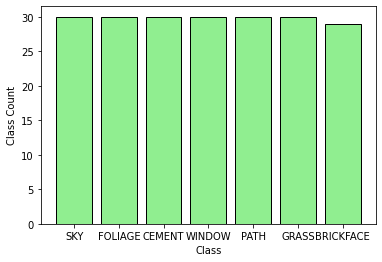

In [35]:
plt.bar(r1.index,r1,color='lightgreen',edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Class Count')
plt.show()

### Selecting Indepedent and the Dependent Features

In [36]:
df.columns

Index(['Class', 'region.centroid.col', 'region.centroid.row',
       'region.pixel.count', 'short.line.density.5', 'short.line.density.2',
       'vedge.mean', 'vegde.sd', 'hedge.mean', 'hedge.sd', 'intensity.mean',
       'rawred.mean', 'rawblue.mean', 'rawgreen.mean', 'exred.mean',
       'exblue.mean', 'exgreen.mean', 'value.mean', 'saturation.mean',
       'hue-mean'],
      dtype='object')

In [37]:
x = df.drop('Class',axis=1)  # x = df.iloc[:,1:]      , axis=1 indicates columns
y = df['Class']              # y = df.iloc[:,0]          
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(209, 19)
(209,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Splitting data into training and test data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
print(209*0.30)

62.699999999999996


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=35)
print(x_train.shape) # dataframe
print(x_test.shape)  # dataframe
print(y_train.shape) # series
print(y_test.shape)  # series

(146, 19)
(63, 19)
(146,)
(63,)


### Creating Functions to compute Confusion matrix, Clasification Report and Training and Testing Score

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuarcy

#### Importing the library

In [48]:
from sklearn.linear_model import LogisticRegression

#### Building LogisticRegression Model

In [49]:
log_reg = LogisticRegression(max_iter=1000,solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#### Compute Training and Testing Score(Accuracy)

In [50]:
mscore(log_reg)

Training Score 0.9383561643835616
Testing Score 0.9047619047619048


#### Generate the predictions

In [51]:
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg[:7])

['FOLIAGE' 'FOLIAGE' 'BRICKFACE' 'FOLIAGE' 'WINDOW' 'FOLIAGE' 'FOLIAGE']


#### Evaluate the performance of Classifier

In [52]:
cls_eval(y_test,ypred_logreg)

[[11  0  1  0  0  0  0]
 [ 0  6  0  0  1  0  2]
 [ 0  0 12  0  0  0  1]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  9  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  0  0  8]]
Accuracy Score 0.9047619047619048
              precision    recall  f1-score   support

   BRICKFACE       1.00      0.92      0.96        12
      CEMENT       1.00      0.67      0.80         9
     FOLIAGE       0.86      0.92      0.89        13
       GRASS       1.00      1.00      1.00         5
        PATH       0.90      1.00      0.95         9
         SKY       1.00      1.00      1.00         6
      WINDOW       0.73      0.89      0.80         9

    accuracy                           0.90        63
   macro avg       0.93      0.91      0.91        63
weighted avg       0.92      0.90      0.90        63

